<a href="https://colab.research.google.com/github/xup5/Computational-Neuroscience-Class/blob/main/Project%20Option%202%20Hopfield%20Network/Hopfield_network_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hopfield network

This jupyter notebook is a structured template for the final project. By Xu Pan and Odelia Schwartz, 2022.

The project has 6 sections. In section 1, you need to implement a Hopfield network by filling in the missing code in the Hopfield_nn class (function one_shot_learn and run_step). The following sections are about testing your implementation and exploring some properties of the Hopfield network. The last section is extra, you are free to explore any other questions related to Hopfield network (for example what is a [modern Hopfield network](https://en.wikipedia.org/wiki/Modern_Hopfield_network)) and write a short summary (one paragraph) about what you find.

We recommend using -1 / 1 neural state, one-shot learning rule (Hebbian), and asynchronous updating, but you are free to explore other options (alternatives are 0 / 1 neural state, iterative learning rule (Storkey), and synchronous updating).

---

**Hebbian learning rule:**

$w_{ij}=1/N*\sum_{u}{p^{u}_{i}p^{u}_{j}}$

or $W=1/N\sum_{u}{\textbf{p}^{i}\textbf{p}^{iT}}$ (and enforce diagnal to be 0)

where N is the number of neurons, $p^{u}_{i}$ is the ith neuron's state in uth pattern.


---


**Update rule:**

$s_{i}(t+1)=sign(\sum_{j}{w_{ij}s_j(t)})$

where $s_i$ is the ith neuron's state. "sign" is the sign function.

---

In the final report, you need to answer the questions, show your code and figures you generated in this project.

Useful references:

[Slides on course website](https://www.cs.miami.edu/home/odelia/teaching/compneuro2021/syllabus/index.html)

[Scholarpedia](http://www.scholarpedia.org/article/Hopfield_network)

[Wikipedia](https://en.wikipedia.org/wiki/Hopfield_network)


## 1. Make a Hopfield network class

Fill in the "TO DO" in ***one_shot_learn*** and ***run_step*** using the Hebbian learning rule and update rule provided above

You need some knowledge about object oriented code and how to use class for this project.

http://docs.python.org/tutorial/classes.html

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
class Hopfield_nn:

  def __init__(self, size):
    self.size = size # neuron number
    self.current_state = np.zeros(size)-1 # current state
    self.order = np.random.permutation(size) # the order to update neural states (asynchronous)

  def get_current_state(self):
    return self.current_state

  def one_shot_learn(self, patterns):
    # patterns is a list of np arrays.
    self.w = np.zeros(shape=(self.size, self.size)) # weight matrix.
    # TO DO: fill in the weight matrix self.w.
    # Hint: You can use a 3-level nested loop (pattern, neuron, neuron),
    # or if you know linear algebra you can use one loop (pattern) with outter product.
    # Hint: Either way, make sure your weight matrix should be symmetric and 
    # diagnal should be 0s (no recurrent connection).

    return # don't need to return anything.

  def set_state(self, pattern):
    self.current_state = pattern

  def run_step(self):
    # TO DO: use the order defined in self.order to update neural state in self.current_state.
    # A "step" means all neurons get updated once.
    # Hint: You can use nested loop (pattern, neuron), or if you know linear
    # algebra you can save one loop.

    return # don't need to return anything.

  def run_till_converge(self, max_it=2000):
    previous_state = np.copy(self.current_state)
    for i in range(max_it):
      # print(i)
      self.run_step()
      if np.array_equal(previous_state, self.current_state):
        return
      previous_state = np.copy(self.current_state)
    print("Warning! Reach max iteration.")

  # def energy(self):
  #   return -self.current_state[None,:] @ self.w @ self.current_state[:,None]

In [ ]:
# Two helper functions I worte for you to generate random pattern(s):

def random_pattern(size):
  return (np.random.randint(2, size=size)-0.5)*2

def n_random_patterns(n, size):
  return [(np.random.randint(2, size=size)-0.5)*2 for i in range(n)]

## 2. Test your network with a single pattern.

Let's generate a random pattern and store it in your network. Your network should be able to restore the pattern when several units are "wrong" (i.e. flipped).

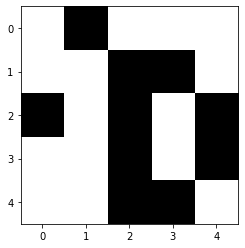

In [ ]:
# network size (neuron number)
size = 25

# Instantiate a Hopfield_nn object
hn = Hopfield_nn(size=size)

# Get a random pattern
pattern = random_pattern(size)

# Visualize the pattern. We transform this 25-length vector to a 5x5 matrix just for better visual.
plt.imshow(np.reshape(pattern,(5,5)), cmap='gray')


In [ ]:
# Now learn this pattern
hn.one_shot_learn([pattern]) # make pattern a list because one_shot_learn requirs a list input.

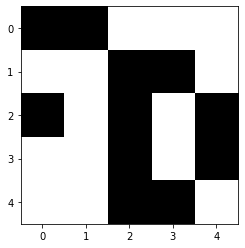

In [ ]:
# Now the network is able to restore the learned pattern when a noisy pattern is given.
# Let's set the state of the nn to be the pattern but with one unit flipped.
# Note that neural state is either -1 or 1. To flip a state, we simply add a "-".

# Create a noisy pattern.
index_to_flip = np.random.permutation(size)[0]
noisy_pattern = np.copy(pattern)
noisy_pattern[index_to_flip] = -noisy_pattern[index_to_flip]

# Set the sate of the network to be the noisy pattern.
hn.set_state(noisy_pattern)

# Visualize current state to verify it is the noisy pattern.
current_state = hn.get_current_state()
plt.imshow(np.reshape(current_state,(5,5)), cmap='gray')

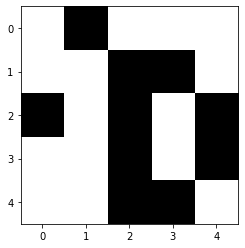

In [ ]:
# Because the network learned the pattern, it should restore the original pattern after updating.
hn.run_till_converge()
current_state = hn.get_current_state()
plt.imshow(np.reshape(current_state,(5,5)), cmap='gray')

So far, you should see three figures. The first one is the orignal pattern; the second one is a noisy pattern that has one unit flipped; the third one is the restored pattern which should be the same as the first one. 

Now try how many unit you can flip and still restore the pattern.

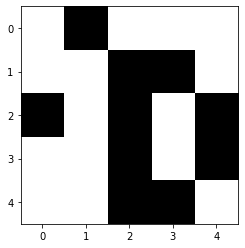

In [ ]:
num_flips = 3 # TO DO: change this number, find the max that nn can still restore the pattern.

index_to_flip = np.random.permutation(size)[0:num_flips]
noisy_pattern = np.copy(pattern)
noisy_pattern[index_to_flip] = -noisy_pattern[index_to_flip]
hn.set_state(noisy_pattern)
hn.run_till_converge()
current_state = hn.get_current_state()
plt.imshow(np.reshape(current_state,(5,5)), cmap='gray')

**Question:** Can you find another attractor other than the stored pattern? What is its relationship to the stored pattern? Why? (Hint: check weight matrix formula) 

## 3. Interference between patterns

Hopfield network is able to learn multiple patterns. However, when the stored pattern number increases, the abilility of restoration decreases. Let's try to put 2 patterns in the network.

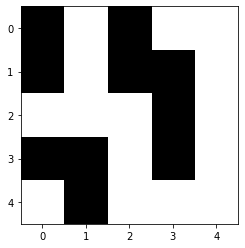

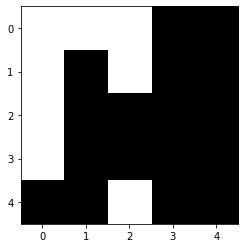

In [ ]:
# Get 2 random patterns
patterns = n_random_patterns(2, size)

# Visualize the pattern. We transform this 25-length vector to a 5x5 matrix just for better visual.
plt.imshow(np.reshape(patterns[0],(5,5)), cmap='gray')
plt.show()
plt.imshow(np.reshape(patterns[1],(5,5)), cmap='gray')
plt.show()

In [ ]:
# Now learn these 2 patterns
hn.one_shot_learn(patterns)

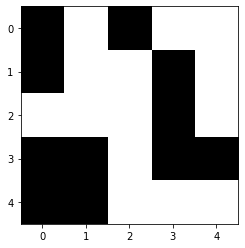

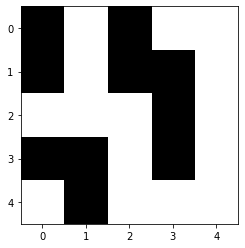

In [ ]:
# The network should converge to the nearest pattern.
# Let's start with a small deviation from pattern 0.
# It should converge to pattern 0.

num_flips = 3

index_to_flip = np.random.permutation(size)[0:num_flips]
noisy_pattern = np.copy(patterns[0])
noisy_pattern[index_to_flip] = -noisy_pattern[index_to_flip]
hn.set_state(noisy_pattern)

current_state = hn.get_current_state()
plt.imshow(np.reshape(current_state,(5,5)), cmap='gray')
plt.show()
hn.run_till_converge()
current_state = hn.get_current_state()
plt.imshow(np.reshape(current_state,(5,5)), cmap='gray')
plt.show()

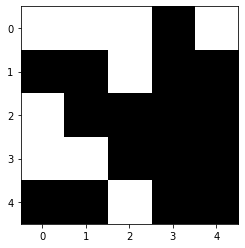

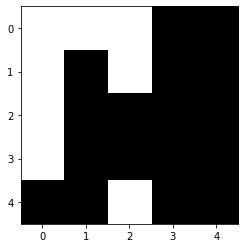

In [ ]:
# Similarly if we start with a small deviation from pattern 1.
# It should converge to pattern 1.

num_flip = 3

index_to_flip = np.random.permutation(size)[0:num_flip]
noisy_pattern = np.copy(patterns[1])
noisy_pattern[index_to_flip] = -noisy_pattern[index_to_flip]
hn.set_state(noisy_pattern)

current_state = hn.get_current_state()
plt.imshow(np.reshape(current_state,(5,5)), cmap='gray')
plt.show()
hn.run_till_converge()
current_state = hn.get_current_state()
plt.imshow(np.reshape(current_state,(5,5)), cmap='gray')
plt.show()

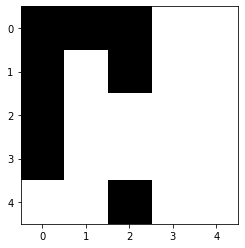

In [ ]:
# Now, let's find the max flips that can be restored.
# Because we have 2 stored patterns, the tolerance of the network decreases.

num_flip = 5 # TO DO: Change this value, find the max that network can be restored. 

index_to_flip = np.random.permutation(size)[0:num_flip]
noisy_pattern = np.copy(patterns[0])
noisy_pattern[index_to_flip] = -noisy_pattern[index_to_flip]
hn.set_state(noisy_pattern)
hn.run_till_converge()
current_state = hn.get_current_state()
plt.imshow(np.reshape(current_state,(5,5)), cmap='gray')
plt.show()

## 4. Capacity

If we store too many patterns in a Hopfield network, a small deviation can lead the network to converge into a wrong pattern.

If we require perfect retrieval that the network can restore the pattern when 1 unit is wrong, now try to find the maximum number of patterns that can be stored and perfectly retrieved in a Hopfield network.

In [ ]:
size = 25
hn = Hopfield_nn(size=size)
break_flag = False
for num_patterns in range(size):
  # store num_patterns patterns in the network
  patterns = n_random_patterns(num_patterns, size)
  hn.one_shot_learn(patterns)
  # test if all the patterns can be retrieved perfectly
  for pattern in patterns:
    # flip 1 unit
    index_to_flip = np.random.permutation(size)[0]
    noisy_pattern = np.copy(pattern)
    noisy_pattern[index_to_flip] = -noisy_pattern[index_to_flip]
    hn.set_state(noisy_pattern)
    hn.run_till_converge()
    current_state = hn.get_current_state()
    if not np.array_equal(pattern, current_state):
      print("Pattern unretrievable when num_patterns="+str(num_patterns))
      break_flag = True
      break
  if break_flag:
    break

Pattern unretrievable when num_patterns=4


**TO DO:** You may find that the number above fluctuates. Now try to find the capacity of a Hopfield network with 1000 neurons. Run 20 times, then calculate the mean capacity.

## 5. Playground

In the above experiments we used random patterns. Now try to make visual patterns by hand, such as 3 letters or any other interesting patterns. Repeat the "noise" experiment (i.e. how many flips can the network tolerate).

## 6. Extra

Feel free to explore any other questions related to Hopfield network (for example what is a [modern Hopfield network](https://en.wikipedia.org/wiki/Modern_Hopfield_network)).